In [1]:
#Imports

import keras
import pandas as pd
import numpy as np
import joblib

import tensorflow as tf
from keras import Model

from sklearn.metrics import precision_recall_fscore_support, classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
df_test = joblib.load('lstm_test.sav')
df_train = joblib.load('lstm_train.sav')
df_val = joblib.load('lstm_val.sav')

# Mean Model on outputs


In [24]:
input_ids = np.array(df_train['mean_features'].tolist())
labels = np.array(df_train['label'].tolist())
test_input_ids = np.array(df_test['mean_features'].tolist())
test_labels = np.array(df_test['label'].tolist())
val_input_ids = np.array(df_val['mean_features'].tolist())
val_labels = np.array(df_val['label'].tolist())

In [25]:
# Re-train model with best results
inp = tf.keras.layers.Input(shape=(768))
X = tf.keras.layers.Dense(1000, activation='tanh')(inp)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(2, activation='softmax')(X)
model = tf.keras.Model(inputs=inp, outputs = X)

opt = keras.optimizers.Adam(learning_rate=2e-5)


model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

epochs = 10
history = model.fit(x = input_ids, 
                    y = labels,
                    epochs=epochs,
                    batch_size = 8,
                    validation_data=(val_input_ids, val_labels))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 768)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              769000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 2002      
Total params: 771,002
Trainable params: 771,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
81/81 [==============================] - 0s 3ms/step - loss: 0.6959 - acc: 0.5502 - val_loss: 0.6700 - val_acc: 0.5926
Epoch 2/10
81/81 [==============================] - 0s 2ms/step - loss: 0.6823 - acc: 0.5657 - val_loss: 0.6676 - val_acc

In [26]:
# evaluate 
model.evaluate(test_input_ids, test_labels)

3/3 [==============================] - 0s 1ms/step - loss: 0.6149 - acc: 0.7284


[0.614896833896637, 0.7283950448036194]

In [27]:
y_log = model.predict(test_input_ids)
y_pred = np.argmax(y_log, axis=1)

In [28]:
# Show classification report
from sklearn.metrics import precision_recall_fscore_support, classification_report
print("Mean Pooling split chunks")
print(classification_report(df_test['label'], y_pred))

Mean Pooling split chunks
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        37
           1       0.76      0.73      0.74        44

    accuracy                           0.73        81
   macro avg       0.73      0.73      0.73        81
weighted avg       0.73      0.73      0.73        81



# MAX Model on fixed outputs


In [120]:
input_ids = np.array(df_train['max_features'].tolist())
labels = np.array(df_train['label'].tolist())
test_input_ids = np.array(df_test['max_features'].tolist())
test_labels = np.array(df_test['label'].tolist())
val_input_ids = np.array(df_val['max_features'].tolist())
val_labels = np.array(df_val['label'].tolist())

In [138]:
# Re-train model with best results
inp = tf.keras.layers.Input(shape=(768))
X = tf.keras.layers.Dense(1000, activation='tanh')(inp)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(2, activation='softmax')(X)
model = tf.keras.Model(inputs=inp, outputs = X)

opt = keras.optimizers.Adam(learning_rate=2e-5)


model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

epochs = 10
history = model.fit(x = input_ids, 
                    y = labels,
                    epochs=epochs,
                    batch_size = 8,
                    validation_data=(val_input_ids, val_labels))

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 768)]             0         
_________________________________________________________________
dense_38 (Dense)             (None, 1000)              769000    
_________________________________________________________________
dropout_19 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 2002      
Total params: 771,002
Trainable params: 771,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
81/81 [==============================] - 0s 3ms/step - loss: 0.6941 - acc: 0.5672 - val_loss: 0.6710 - val_acc: 0.5926
Epoch 2/10
81/81 [==============================] - 0s 2ms/step - loss: 0.6945 - acc: 0.5703 - val_loss: 0.6628 - val_ac

In [139]:
model.evaluate(test_input_ids, test_labels)

3/3 [==============================] - 0s 2ms/step - loss: 0.6080 - acc: 0.6667


[0.6080079078674316, 0.6666666865348816]

In [140]:
y_log = model.predict(test_input_ids)
y_pred = np.argmax(y_log, axis=1)

In [141]:
# Show classification report
from sklearn.metrics import precision_recall_fscore_support, classification_report
print("Max Pooled split chunks")
print(classification_report(df_test['label'], y_pred))

Max Pooled split chunks
              precision    recall  f1-score   support

           0       0.71      0.46      0.56        37
           1       0.65      0.84      0.73        44

    accuracy                           0.67        81
   macro avg       0.68      0.65      0.65        81
weighted avg       0.68      0.67      0.65        81



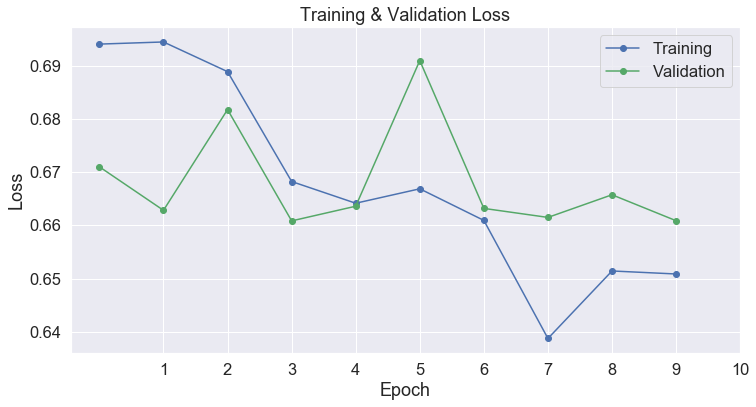

In [142]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(history.history['loss'], 'b-o', label="Training")
plt.plot(history.history['val_loss'], 'g-o', label="Validation")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9,10])

plt.show()

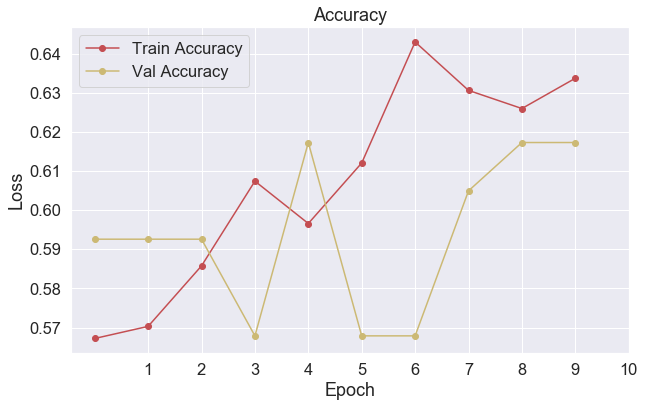

In [143]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(history.history['acc'], 'r-o', label="Train Accuracy")
plt.plot(history.history['val_acc'], 'y-o', label="Val Accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9,10])

plt.show()